# import libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as Knearestneighbors
%matplotlib inline



# Set current directory and load data

In [142]:
pwd='C:\OneDrive\MSBA\kaggle\will_bill_solve_it.tar\will_bill_solve_it'
trainProblems=pd.read_csv(pwd+'/train/problems.csv')
trainUsers=pd.read_csv(pwd+'/train/users.csv')
trainSubmissions=pd.read_csv(pwd+'/train/submissions.csv')
testProblems=pd.read_csv(pwd+'/test/problems-test.csv')
testUsers=pd.read_csv(pwd+'/test/users-test.csv')
#this file contains only problem id to user submission mapping no other details provided
testSubmissions=pd.read_csv(pwd+'/test/test.csv')


# Combining test and train datasets for preprocessing the data


In [143]:
trainProblems['recordtype']='train'
testProblems['recordtype']='test'

In [144]:
fullProblems=pd.concat([trainProblems,testProblems])

In [145]:
fullProblems.info()# gives number of non-missing values in the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 955
Data columns (total 12 columns):
problem_id      1958 non-null int64
level           1520 non-null object
accuracy        1958 non-null float64
solved_count    1958 non-null int64
error_count     1958 non-null int64
rating          1958 non-null float64
tag1            1391 non-null object
tag2            895 non-null object
tag3            339 non-null object
tag4            87 non-null object
tag5            13 non-null object
recordtype      1958 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 198.9+ KB


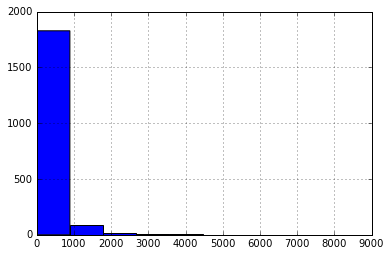

In [146]:
fullProblems.solved_count.hist() # getting an idea of solved count values distribution over problems

In [147]:
#checking the distribution of problems that are solved for level values that are missing
fullProblems.ix[pd.isnull(trainProblems.level),3:4].describe() 


,solved_count
count,456.000000
mean,210.067982
std,525.837423
min,0.000000
25%,32.000000
50%,84.000000
75%,200.500000
max,8922.000000


In [151]:
#Average number of problems solved at each level
fullProblems.groupby('level')['solved_count'].mean()


level
E      540.891396
E-M    178.109677
H       35.447368
M      118.416667
M-H     59.375000
O       60.750000
Name: solved_count, dtype: float64

In [152]:
fullProblems.groupby('level')['problem_id'].count()

level
E      709
E-M    155
H      152
M      468
M-H     32
O        4
Name: problem_id, dtype: int64

## 75 % of solved_count data lies in the range of 21-130 for missing 'level' values. Also M and E-M levels falls in this range.However, number of M observations is three times that of E-M. Hence setting missing level values to M difficulty based on the data

In [153]:
fullProblems.level.fillna('M',inplace=True)


In [154]:
#More than 50 % of the data in these columns has missing values hence dropping them. Accuracy has very less variability
fullProblems=fullProblems.drop(['tag2','tag3','tag4','tag5'],axis=1)


In [167]:
df=fullProblems.groupby('tag1')['problem_id'].count()
df.sort_values()

tag1
Binary Tree                 1
Bipartite Graph             1
cake-walk                   2
adhoc                       2
Flow                        2
Fenwick Tree                2
Extended Euclid             2
Queue                       2
Data-Structures             2
DFS                         2
Simple-math                 2
Matrix Exponentiation       2
Completed                   2
Modular arithmetic          2
Ad-hoc                      2
Trees                       2
HashMap                     2
Binary Search Tree          2
Minimum Spanning Tree       3
Number Theory               3
Floyd Warshall              3
Game Theory                 3
Modular exponentiation      4
Heap                        4
Sailesh Arya                4
Dijkstra                    5
Sieve                       5
Priority Queue              6
Trie                        6
BIT                         6
Probability                 7
Disjoint Set                8
Greedy                      9
Prime

In [169]:
#filling missing values with no value as no single value for tag1 has a clear majority in its occurence
fullProblems.tag1.fillna('no value',inplace=True)


In [175]:
trainProblems= fullProblems.loc[fullProblems['recordtype']=='train','problem_id':'tag1']
testProblems= fullProblems.loc[fullProblems['recordtype']=='test','problem_id':'tag1']

In [176]:
trainUsers['recordtype']='train'
testUsers['recordtype']='test'

In [177]:
fullUsers=pd.concat([trainUsers,testUsers])

In [178]:
fullUsers.describe()

,user_id,solved_count,attempts
count,77809.000000,77809.000000,77809.000000
mean,1155162.355576,10.657071,15.608117
std,177017.284906,26.594750,49.933960
min,903633.000000,0.000000,0.000000
25%,997644.000000,1.000000,2.000000
50%,1123249.000000,3.000000,5.000000
75%,1315405.000000,9.000000,16.000000
max,1556984.000000,789.000000,7211.000000


In [213]:
fullUsers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77809 entries, 0 to 15278
Data columns (total 6 columns):
user_id         77809 non-null int64
skills          77550 non-null object
solved_count    77809 non-null int64
attempts        77809 non-null int64
user_type       77809 non-null object
recordtype      77809 non-null object
dtypes: int64(3), object(3)
memory usage: 4.2+ MB


In [181]:
fullUsers.groupby('user_type')['user_id'].count()

user_type
S     8664
W    34010
Name: user_id, dtype: int64

In [212]:
#replacing missing values with 'w' as it has the most number of occurences
fullUsers.user_type.fillna('W',inplace=True)

In [216]:
df=fullUsers.groupby('skills')['user_id'].count()
df.sort_values()

skills
JavaScript(Node.js)|C#                                                                                              1
Python|C#|C|Go|C++                                                                                                  1
Pascal|C                                                                                                            1
C|Java|Python 3|C#|C++|Python                                                                                       1
C|Java|Python 3|C++                                                                                                 1
PHP|Java|Python|Perl|JavaScript(Node.js)|R(RScript)|Objective-C|Haskell|JavaScript(Rhino)|Go|Clojure|Ruby|C#        1
PHP|Java|Perl                                                                                                       1
PHP|Java|JavaScript(Rhino)                                                                                          1
PHP|Java|JavaScript                              

In [218]:
fullUsers.columns

Index(['user_id', 'solved_count', 'attempts', 'user_type', 'recordtype'], dtype='object')

In [217]:
#dropping skills as it can be observed majority of the values are same with same languages listed. We wouldn't be able to 
#infer much from this column
fullUsers=fullUsers.drop(['skills'],axis=1)

In [219]:
testUsersCleaned=fullUsers.loc[fullUsers['recordtype']=='test','user_id':'user_type']
trainUsersCleaned=fullUsers.loc[fullUsers['recordtype']=='train','user_id':'user_type']

In [220]:
trainUsersCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62530 entries, 0 to 62529
Data columns (total 4 columns):
user_id         62530 non-null int64
solved_count    62530 non-null int64
attempts        62530 non-null int64
user_type       62530 non-null object
dtypes: int64(3), object(1)
memory usage: 2.4+ MB


In [186]:
trainSubmissions['solved']=0

In [187]:
#setting solved column to 1 if both the conditions are satisfied. According the business rule
mask=(trainSubmissions['solved_status']=='SO') & (trainSubmissions['result']=='AC')

In [188]:
trainSubmissions.loc[mask,'solved']=1

In [189]:
#dropping all the other columns, these columns are not available in test data so won't use them for training our model as well
trainSubmissions=trainSubmissions.drop(['solved_status','result','language_used','execution_time'],axis=1)

In [190]:
trainSubmissions.head()

,user_id,problem_id,solved
0,1056149,918786,0
1,1056149,918786,1
2,1347625,909223,1
3,967099,936829,1
4,924192,916333,0


In [221]:
#join data to get a combined data set for training data
trainMerged=pd.merge(trainSubmissions,trainProblems, left_on='problem_id', right_on='problem_id', how='inner')
trainMerged=pd.merge(trainMerged, trainUsersCleaned, left_on='user_id', right_on='user_id', how='inner')
trainMerged.shape

(1048575, 12)

In [222]:
testMerged=pd.merge(testSubmissions,testProblems, left_on='problem_id', right_on='problem_id', how='inner')
testMerged=pd.merge(testMerged, testUsersCleaned, left_on='user_id', right_on='user_id', how='inner')
testMerged.shape

(35618, 12)

In [230]:
trainMerged=trainMerged.drop(['solved_count_y'],axis=1)
testMerged=testMerged.drop(['solved_count_y'],axis=1)

In [231]:
trainMerged.head()

,user_id,problem_id,solved,level,accuracy,solved_count_x,error_count,rating,tag1,attempts,user_type
0,1056149,918786,0,0,0.63,755,1071,3.4,0,118,W
1,1056149,918786,1,0,0.63,755,1071,3.4,0,118,W
2,1056149,909223,1,0,0.75,1691,1465,2.6,53,118,W
3,1056149,913738,0,0,0.53,2241,8197,4.0,32,118,W
4,1056149,913738,1,0,0.53,2241,8197,4.0,32,118,W


In [59]:
target = [x[2] for x in trainMerged]
train = [x[1:] for x in trainMerged]

In [232]:
trainMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
user_id           1048575 non-null int32
problem_id        1048575 non-null int32
solved            1048575 non-null int32
level             1048575 non-null int64
accuracy          1048575 non-null float64
solved_count_x    1048575 non-null int32
error_count       1048575 non-null int32
rating            1048575 non-null float32
tag1              1048575 non-null int64
attempts          1048575 non-null int32
user_type         1048575 non-null object
dtypes: float32(1), float64(1), int32(6), int64(2), object(1)
memory usage: 68.0+ MB


# Converting data frame to numpy array. Encoding catergorical variables

In [250]:
#converting to 32 bit, this is to avoid memory cache error on 32 bit machines and IDEs
trainMerged.user_id=trainMerged.user_id.astype('int32')
trainMerged.problem_id=trainMerged.problem_id.astype('int32')
trainMerged.solved=trainMerged.solved.astype('int32')
trainMerged.solved_count_x=trainMerged.solved_count_x.astype('int32')
trainMerged.error_count=trainMerged.error_count.astype('int32')
trainMerged.rating=trainMerged.rating.astype('float32')
trainMerged.attempts=trainMerged.attempts.astype('int32')
trainMerged.accuracy=trainMerged.accuracy.astype('int32')
trainMerged.level=trainMerged.level.astype('int32')
trainMerged.tag1=trainMerged.tag1.astype('int32')
trainMerged.user_type=trainMerged.user_type.astype('int32')

In [254]:
y, _ = pd.factorize(trainMerged.solved.astype('int32'))

In [227]:
le_level = preprocessing.LabelEncoder()
#to convert into numbers
trainMerged.level = le_level.fit_transform(trainMerged.level)


In [241]:
le_type = preprocessing.LabelEncoder()
#to convert into numbers
trainMerged.user_type = le_type.fit_transform(trainMerged.user_type)

In [228]:
le_tag = preprocessing.LabelEncoder()
#to convert into numbers
trainMerged.tag1 = le_type.fit_transform(trainMerged.tag1)

In [70]:
# standardizing data to minimize effects of high absolute values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(trainMerged)

In [235]:
trainMerged.columns

Index(['user_id', 'problem_id', 'solved', 'level', 'accuracy',
       'solved_count_x', 'error_count', 'rating', 'tag1', 'attempts',
       'user_type'],
      dtype='object')

In [242]:
trainMerged.loc[:,'solved':'user_type'].corr()

,solved,level,accuracy,solved_count_x,error_count,rating,tag1,attempts,user_type
solved,1.000000,-0.115286,0.124193,0.232642,0.013314,0.042784,-0.032257,0.002808,-0.011253
level,-0.115286,1.000000,-0.075417,-0.323856,-0.215977,-0.204996,0.290921,0.063417,-0.068325
accuracy,0.124193,-0.075417,1.000000,0.078877,-0.366547,0.109150,0.101125,0.012766,0.058947
solved_count_x,0.232642,-0.323856,0.078877,1.000000,0.590464,0.149460,-0.238209,-0.079992,0.084777
error_count,0.013314,-0.215977,-0.366547,0.590464,1.000000,0.166097,-0.247942,-0.085573,0.069832
rating,0.042784,-0.204996,0.109150,0.149460,0.166097,1.000000,-0.041189,-0.068466,0.113053
tag1,-0.032257,0.290921,0.101125,-0.238209,-0.247942,-0.041189,1.000000,0.040362,0.000537
attempts,0.002808,0.063417,0.012766,-0.079992,-0.085573,-0.068466,0.040362,1.000000,-0.089842
user_type,-0.011253,-0.068325,0.058947,0.084777,0.069832,0.113053,0.000537,-0.089842,1.000000


# There is no evident Multi-collinearity between the features, removing the identity columns and adding other variables as features

In [258]:
features = [ u'level', u'solved_count_x',
       u'error_count',u'attempts',
       u'user_type',u'accuracy',u'tag1']

In [71]:
# Cross validation function - reference y hat blog http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html 

from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred



In [255]:
sum(y==0)

824997

In [251]:
trainMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
user_id           1048575 non-null int32
problem_id        1048575 non-null int32
solved            1048575 non-null int32
level             1048575 non-null int32
accuracy          1048575 non-null int32
solved_count_x    1048575 non-null int32
error_count       1048575 non-null int32
rating            1048575 non-null float32
tag1              1048575 non-null int32
attempts          1048575 non-null int32
user_type         1048575 non-null int32
dtypes: float32(1), int32(10)
memory usage: 52.0 MB


In [271]:
trainMerged.groupby('solved')['problem_id'].count()

solved
0    824997
1    223578
Name: problem_id, dtype: int64

# Train models and evaluate metrics

# with feature set 1

In [260]:
 features = [ u'level', u'solved_count_x',
       u'error_count',u'attempts',
       u'user_type',u'accuracy',u'tag1']
np=trainMerged.as_matrix(columns=features)
randomforestArray=confusion_matrix(y,run_cv(np,y,RandomForestClassifier))

In [261]:

print ("==== random forest======")
print ("accuracy %.3f" %((randomforestArray[0][0]+randomforestArray[1][1])/sum(randomforestArray[0]+randomforestArray[1])))
print ("precision %.3f" %((randomforestArray[1][1])/(randomforestArray[1][1]+randomforestArray[0][1])))
print ("recall %.3f" %((randomforestArray[1][1])/(randomforestArray[1][1]+randomforestArray[1][0])))

==== random forest======
accuracy 0.798
precision 0.546
recall 0.311


In [262]:

np2=trainMerged.as_matrix(columns=features)
knnArray=confusion_matrix(y,run_cv(np2,y,Knearestneighbors))

In [263]:
print ("==== K nearest neighbors======")
print ("accuracy %.3f" %((knnArray[0][0]+knnArray[1][1])/sum(knnArray[0]+knnArray[1])))
print ("precision %.3f" %((knnArray[1][1])/(knnArray[1][1]+knnArray[0][1])))
print ("recall %.3f" %((knnArray[1][1])/(knnArray[1][1]+knnArray[1][0])))

==== K nearest neighbors======
accuracy 0.790
precision 0.513
recall 0.317


# With feature set 2 , removed features with least correlation except attempts as it exhibits non-linear realation as shown in scatter plot

In [266]:
 features = [ u'level', u'solved_count_x',
       u'attempts',
      u'accuracy',u'tag1']
np=trainMerged.as_matrix(columns=features)
randomforestArray=confusion_matrix(y,run_cv(np,y,RandomForestClassifier))

In [267]:
print ("==== random forest======")
print ("accuracy %.3f" %((randomforestArray[0][0]+randomforestArray[1][1])/sum(randomforestArray[0]+randomforestArray[1])))
print ("precision %.3f" %((randomforestArray[1][1])/(randomforestArray[1][1]+randomforestArray[0][1])))
print ("recall %.3f" %((randomforestArray[1][1])/(randomforestArray[1][1]+randomforestArray[1][0])))

==== random forest======
accuracy 0.798
precision 0.549
recall 0.296


In [268]:
np2=trainMerged.as_matrix(columns=features)
knnArray=confusion_matrix(y,run_cv(np2,y,Knearestneighbors))

In [269]:
print ("==== K nearest neighbors======")
print ("accuracy %.3f" %((knnArray[0][0]+knnArray[1][1])/sum(knnArray[0]+knnArray[1])))
print ("precision %.3f" %((knnArray[1][1])/(knnArray[1][1]+knnArray[0][1])))
print ("recall %.3f" %((knnArray[1][1])/(knnArray[1][1]+knnArray[1][0])))

==== K nearest neighbors======
accuracy 0.787
precision 0.501
recall 0.310


# From the above analysis it can be observed that random forest with feature set 1 is a winner. Though all the options are close this option has a slight advantage in terms of accuracy. 
#  ratio of positive: negative being 1:4 in the training data could have caused low precision and recall values. Further feature engineering  and exploring other techniques could improve the performance

#  Below code can be executed on the test data for prediction. As there are no actual values we cannot compare and evaluate model performance here. Code for converting data frame to numpy matrix is exactly the same as training set.

In [275]:
#converting to 32 bit, this is to avoid memory cache error on 32 bit machines and IDEs
le_level = preprocessing.LabelEncoder()
#to convert into numbers
testMerged.level = le_level.fit_transform(testMerged.level)
le_type = preprocessing.LabelEncoder()
#to convert into numbers
testMerged.user_type = le_type.fit_transform(testMerged.user_type)
le_tag = preprocessing.LabelEncoder()
#to convert into numbers
testMerged.tag1 = le_type.fit_transform(testMerged.tag1)

testMerged.user_id=testMerged.user_id.astype('int32')
testMerged.problem_id=testMerged.problem_id.astype('int32')
testMerged.solved_count_x=testMerged.solved_count_x.astype('int32')
testMerged.error_count=testMerged.error_count.astype('int32')
testMerged.rating=testMerged.rating.astype('float32')
testMerged.attempts=testMerged.attempts.astype('int32')
testMerged.accuracy=testMerged.accuracy.astype('int32')
testMerged.level=testMerged.level.astype('int32')
testMerged.tag1=testMerged.tag1.astype('int32')
testMerged.user_type=testMerged.user_type.astype('int32')


# standardizing data to minimize effects of high absolute values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(testMerged)
features = [ u'level', u'solved_count_x',
       u'error_count',u'attempts',
       u'user_type',u'accuracy',u'tag1']
npTest=testMerged.as_matrix(columns=features)

In [276]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(trainMerged[features], y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [277]:
ypred=rf.predict(npTest)

In [285]:
import numpy as npy
npy.savetxt("C:/results.csv", ypred, delimiter=",")